In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'../../')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from medline.data import read_train_labels

Y = read_train_labels()

In [5]:
labels = Y.sum(axis=1)
labels = np.asarray(labels)[:, 0]

In [6]:
np.mean(labels)

9.5388679572733786

In [7]:
np.std(labels)

4.2770549208935149

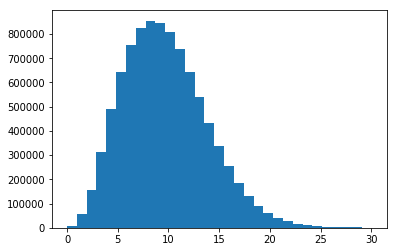

In [8]:
plt.hist(labels, bins=31, range=(0,30));

In [9]:
support = Y.sum(axis=0)
support = np.asarray(support)[0]

(array([ 958.,  375.,  159.,   77.,   65.,   42.,   25.,   17.,   17.,   17.]),
 array([  10000.,   19000.,   28000.,   37000.,   46000.,   55000.,
          64000.,   73000.,   82000.,   91000.,  100000.]),
 <a list of 10 Patch objects>)

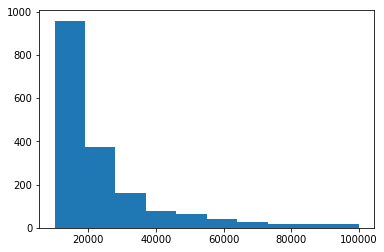

In [10]:
plt.hist(support, range=(10000, 100000))

In [11]:
from scipy.sparse import csc_matrix

def jaccard_similarities(mat):
    # https://na-o-ys.github.io/others/2015-11-07-sparse-vector-similarities.html

    # to prevent overflow when multiplying int8 matrix by itself
    mat = mat.astype(int)
    
    # algorithm works with csc sparse format
    mat = mat.tocsc()

    cols_sum = mat.getnnz(axis=0)
    ab =  mat.T * mat
    
    # ab.data is corrupted otherwise, don't know why
    ab = csc_matrix(ab)

    # for rows
    aa = np.repeat(cols_sum, ab.getnnz(axis=0))
    # for columns
    bb = cols_sum[ab.indices]

    similarities = ab.copy()
    similarities = similarities.astype(float)
    similarities.data /= (aa + bb - ab.data)
    
    return similarities

In [12]:
%time D = jaccard_similarities(Y)

CPU times: user 22.6 s, sys: 304 ms, total: 22.9 s
Wall time: 22.9 s


In [13]:
d = D[np.triu_indices_from(D, k=1)]

In [14]:
len(np.where(d >= 0.1)[0])

774